## K Nearest Neighbors method used on Iris dataset

In [1]:
# importing all required modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

Scikit learn contains a database of pre-loaded datasets that can be accessed in the following way:

In [2]:
# importing datasets
from sklearn import datasets
iris = datasets.load_iris()

However the type is not a typical Pandas dataframe or Numpy array

In [3]:
type(iris)

sklearn.datasets.base.Bunch

The content of the data set can be accessed in the following way:

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
# displaying the set first ten rows
iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [6]:
# assigning data and target to X and y variables that will be used in machine learning
X = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

0 = iris-setosa <br>
1 = iris-versicolor <br>
2 = iris-virginica

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In order to faciliate the display of the data, a data frame can be created

In [8]:
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


## KNN Method applied to Iris dataset

In [10]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [11]:
# spliting the dataset between test and training data (using 40% for test data because of small size of dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)

In [12]:
# Creating the knn classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [13]:
# fitting the data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [14]:
# predicting the outcomes
y_pred = knn.predict(X_test)

In [15]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0])

In [16]:
# model accuracy
knn.score(X_test, y_test)

0.93333333333333335

### Looking for the best number of neighbors for the model

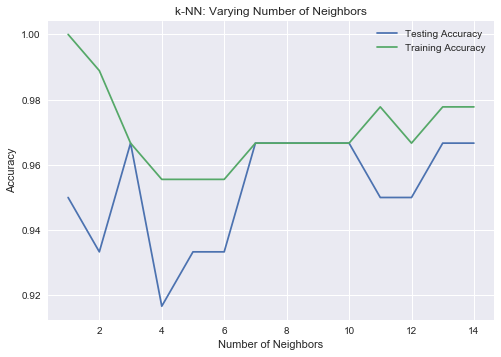

In [17]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy');

It can be concluded the the best accuracies are obtained with  3 or from 7 to 10 neighbors

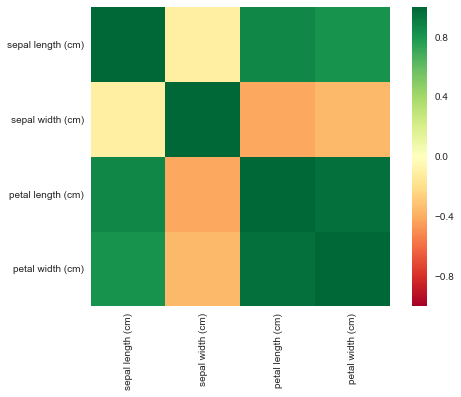

In [18]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn');